In [191]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import numpy as np
from collections import defaultdict
import math

warnings.filterwarnings("ignore")

In [3]:
data = dict()

#DELAAAAAAAAAAAAAAAAAAAAAAAAA
data["2017"] = [pd.read_csv("data/2017/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI")]

#DELA
data["2018"] = [pd.read_csv("data/2018/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2018/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2018/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2018/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]

#DELA
data["2019"] = [pd.read_csv("data/2019/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2019/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

#DELA
data["2020"] = [pd.read_csv("data/2020/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2020/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2020/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2020/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2020/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]

#DELA
data["2021"] = [pd.read_csv("data/2021/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2021/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2021/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

## Neuspeli pregledi po letih

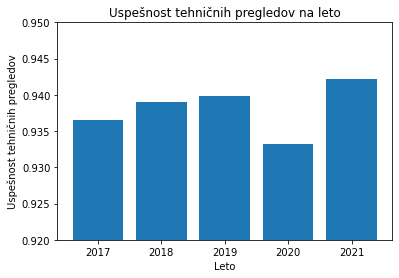

In [46]:
neuspesni_tehnicni_per_year = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0]]

tehnicni_zip = zip(tehnicni_per_year, neuspesni_tehnicni_per_year)
procent_uspesnosti = []

for stevilo, neuspesni in tehnicni_zip:
    procent_uspesnosti.append((stevilo-neuspesni) / stevilo)

procent_uspesnosti

fig, ax = plt.subplots()
plt.ylim(0.92, 0.95)
ax.bar(data.keys(), procent_uspesnosti,)
ax.set_xlabel("Leto")
ax.set_ylabel("Uspešnost tehničnih pregledov")
ax.set_title("Uspešnost tehničnih pregledov na leto")
plt.show()
#data["2017"][1]["TEHNICNI_PREGLED_STATUS"].unique()
#data["2017"][0].shape[0]

In [240]:
neupesni = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')]]
neupesni[0]["PREVOZENI_KILOMETRI"]

[                ZNAMKA  TOVARNISKA_OZNAKA       KOMERCIALNA_OZNAKA  \
 50                OPEL  DS11-5A25BT37FDU5        ASTRA / 1.6 / 16V   
 53                FIAT        179BXB1A-3A       ULYSSE / 2.0 / JTD   
 64          VOLKSWAGEN              70X0C      TRANSPORTER / 2.4 D   
 73             RENAULT             BG4TB6             LAGUNA / 2.0   
 91                FIAT                NaN              DOBLO / 1.6   
 ...                ...                ...                      ...   
 1431413           FIAT         323AXC1A03  LINEA / 1.4 / 16V TURBO   
 1431428        PEUGEOT             PMCFAC            107 / 1.0 / i   
 1431480        RENAULT             KC0AAF             KANGOO / 1.2   
 1431492        RENAULT             CB05CF               CLIO / 1.2   
 1431552  MERCEDES-BENZ             202018                    C 180   
 
         KOMERCIALNI_TIP                VIN VIN_TRAKTORJA KATEGORIJA_OZNAKA  \
 50               ASTRA   W0L0TGF4845109012           NaN          

In [25]:
leta = {"2017","2018","2019","2020","2021"}
lastnosti = data["2017"][1].columns.values.tolist()

korelacija = defaultdict(list)

for leto in leta:
    for lastnost in lastnosti:
        if lastnost != "TEHNICNI_PREGLED_STATUS":
            x = data[leto][1][lastnost].astype("category").cat.codes
            y = data[leto][1]["TEHNICNI_PREGLED_STATUS"].astype("category").cat.codes
            korelacija[lastnost].append(np.corrcoef(x,y)[0,1])
            
korelacija = {k: v for k, v in sorted({ x:abs(np.mean(y)) for x,y in korelacija.items()}.items(), key=lambda item: item[1], reverse=True)}

defaultdict(list,
            {'ZNAMKA': [-0.011344401128075126,
              -0.014074510736631763,
              -0.014740072200397138,
              -0.01232357293471814,
              -0.011511038673207795],
             'TOVARNISKA_OZNAKA': [0.013313770649156464,
              0.01042989349458829,
              0.0055452211173410305,
              -0.0034335621372238614,
              -0.0020309363464672387],
             'KOMERCIALNA_OZNAKA': [-0.0013873143297897308,
              -0.001858395485139838,
              -0.007337632160277532,
              -0.01242716894260506,
              -0.011932333788515641],
             'KOMERCIALNI_TIP': [-0.0011434280932834558,
              -0.0016438777675213455,
              -0.006978715255416224,
              -0.012208662163181392,
              -0.011675610296746616],
             'VIN': [0.03038095606919551,
              0.024508458580409512,
              0.02114198715407774,
              0.013377484246827649,
              0.0

## Število neupešnih pregledov glede na prevožene kilometre

Text(0.5, 0, 'Število prevožnih kilometrov')

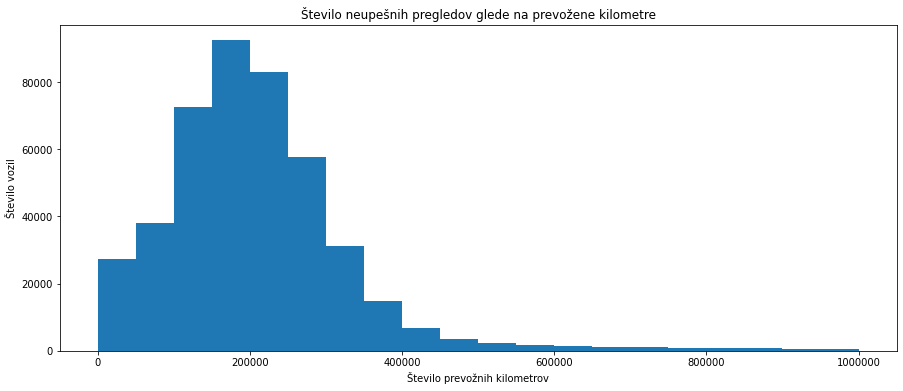

In [87]:
allNeuspesni = []

for x in range(5):
    allNeuspesni.extend(i for i in neupesni[x]["PREVOZENI_KILOMETRI"].values if i < 1000000 and i >= 0)

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(allNeuspesni, bins=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title("Število neupešnih pregledov glede na prevožene kilometre")
ax.set_ylabel("Število vozil")
ax.set_xlabel("Število prevožnih kilometrov")


## Delež neopravljenih tehničnih pregledov glede na znamko

In [105]:
neuspesniZnamka = defaultdict(list)

for i,year in enumerate(leta):
    for x in neupesni[i]["ZNAMKA"].unique():
        if (x not in neuspesniZnamka.keys()):
            neuspesniZnamka[x] = [[],[]]
        a = len(neupesni[i].loc[neupesni[i]["ZNAMKA"] == x])
        b = len(data[year][1].loc[data[year][1]["ZNAMKA"] == x])
        
        neuspesniZnamka[x][0].append(a)
        neuspesniZnamka[x][1].append(b)

#neuspesniZnamka

defaultdict(list,
            {'OPEL': [[5518, 5495, 5554, 6034, 5241],
              [79812, 80097, 80314, 78013, 77099]],
             'FIAT': [[4782, 4420, 4043, 4244, 3570],
              [55414, 55534, 53280, 48238, 46272]],
             'VOLKSWAGEN': [[10144, 9792, 9917, 11594, 9779],
              [165306, 171014, 178453, 180414, 184881]],
             'RENAULT': [[20558, 19535, 18902, 19300, 16912],
              [202294, 198804, 197664, 192018, 189617]],
             'CITROEN': [[5938, 6013, 6293, 7088, 6324],
              [82480, 84319, 86886, 86308, 86234]],
             'ALFA ROMEO': [[771, 752, 655, 696, 541],
              [7843, 7316, 6972, 6489, 5999]],
             'TOYOTA': [[1175, 1214, 1387, 1669, 1582],
              [30040, 31473, 32930, 32836, 34327]],
             'AUDI': [[2366, 2398, 2461, 2963, 2658],
              [44369, 47103, 49438, 51500, 55129]],
             'SYM': [[86, 46, 42, 68, 58], [3953, 3175, 3458, 3616, 3773]],
             'PEUGEOT': [[5877,

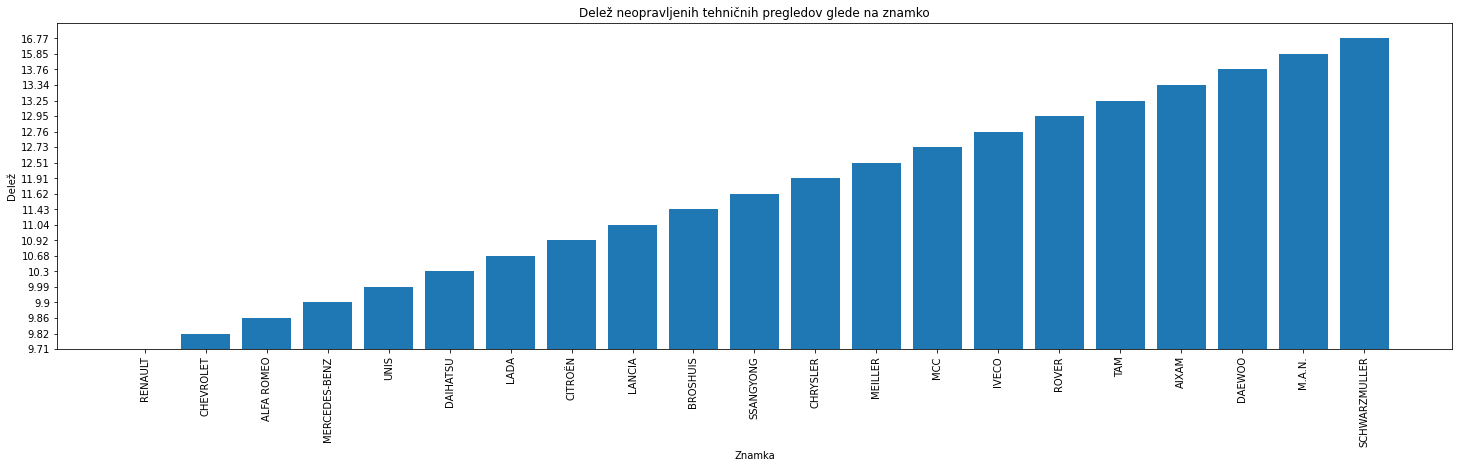

In [194]:
x = np.array([(k,round(v*100, 2)) for k, v in sorted({ x:sum(y[0])/sum(y[1]) for x,y in neuspesniZnamka.items() if sum(y[1]) > 1000 }.items(), key=lambda item: item[1], reverse=True)][20::-1])

plt.figure(figsize=(25,6))
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.bar(x[:,0], x[:,1])
plt.title("Delež neopravljenih tehničnih pregledov glede na znamko")
plt.xticks(rotation="vertical")
plt.ylabel("Delež")
plt.xlabel("Znamka")
plt.show()

## Število tehničnih in odstotek uspešnih pregledov

[93.65718688463669, 93.90124372874973, 93.97975353001141, 93.31990191817397, 94.21829693418502]


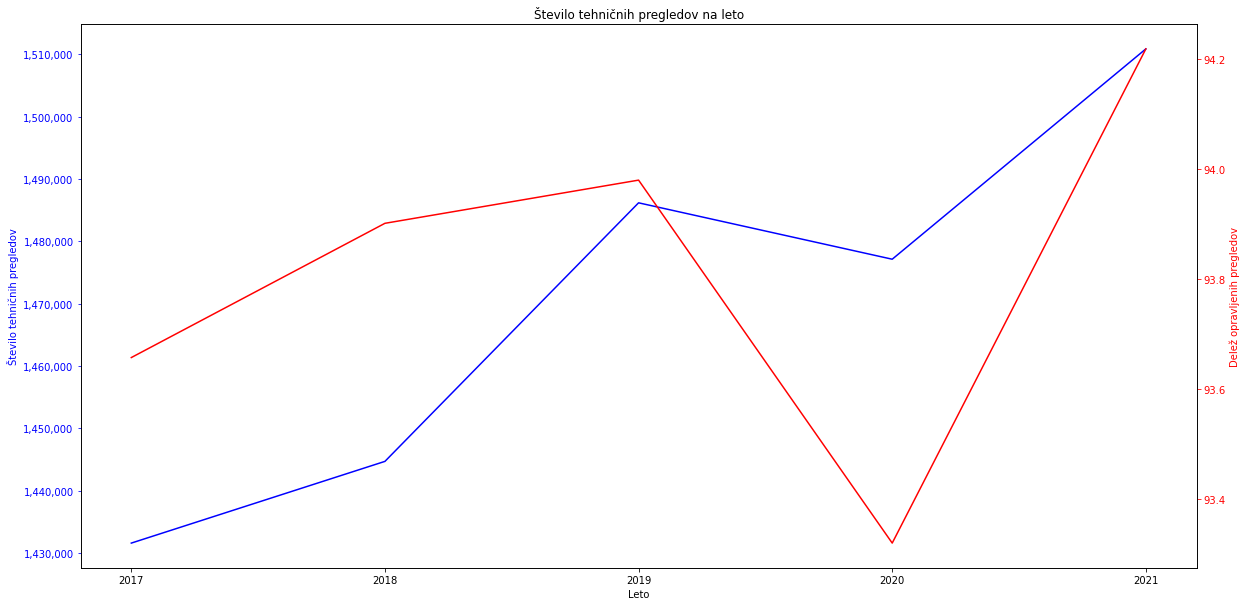

In [218]:
#data["2017"][1].loc[data["2017"][1]["VIN"].unique()]
#data["2017"][2].loc[data["2017"][2]["E-VIN"] == "WAUZZZ4BZ1N098776"]
#data["2021"][1].columns.values.tolist()

tehnicni_per_year = [data["2017"][1].shape[0], data["2018"][1].shape[0], data["2019"][1].shape[0], data["2020"][1].shape[0], data["2021"][1].shape[0]]

delezNeuspesnihPoLetih = [(1-len(neupesni[i])/tehnicni_per_year[i])*100 for i in range(5)]

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()

ax.plot(data.keys(), tehnicni_per_year, color="blue")
ax.set_xlabel("Leto")
ax.set_ylabel("Število tehničnih pregledov", color="blue")
ax.set_title("Število tehničnih pregledov na leto")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis="y", colors="blue", which="both")


ax3 = ax.twinx()
ax3.plot(delezNeuspesnihPoLetih, color="red")
ax3.set_ylabel("Delež opravljenih pregledov", color="red")
ax3.tick_params(axis="y", colors="red", which="both")

plt.show()

## Uvozi vozil

In [ ]:
procent_uvozenih = dict()

procent_uvozenih["2017"] = (len(data["2017"][1]) - len(np.where(data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2017"][1])
procent_uvozenih["2018"] = (len(data["2018"][1]) - len(np.where(data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2018"][1])
procent_uvozenih["2019"] = (len(data["2019"][1]) - len(np.where(data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2019"][1])
procent_uvozenih["2020"] = (len(data["2020"][1]) - len(np.where(data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2020"][1])
procent_uvozenih["2021"] = (len(data["2021"][1]) - len(np.where(data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2021"][1])

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(procent_uvozenih.keys(), procent_uvozenih.values(), marker='o')
ax.set_xlabel("Leto")
ax.set_ylabel("Procent uvoženih avtov")
ax.set_title("Procent uvoženih avtov na leto")

for x, y in zip(procent_uvozenih.keys(), procent_uvozenih.values()):
    label = "{:.4f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

#print(len(data["2018"][1]))
#data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"]
#fixed

## Uvozena vozila v primerjavi z domestičnimi

In [247]:
#np.where(data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"] and data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*'))

uvozenaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

domesticnaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

In [262]:
stevu = 0
stevd = 0
vsad = 0
vsau = 0

for year in range(5):
    vsad += len(domesticnaVozila[year])
    vsau += len(uvozenaVozila[year])

    stevd += len(pd.merge(domesticnaVozila[year], neupesni[year], how="inner"))
    stevu += len(pd.merge(uvozenaVozila[year], neupesni[year], how="inner"))


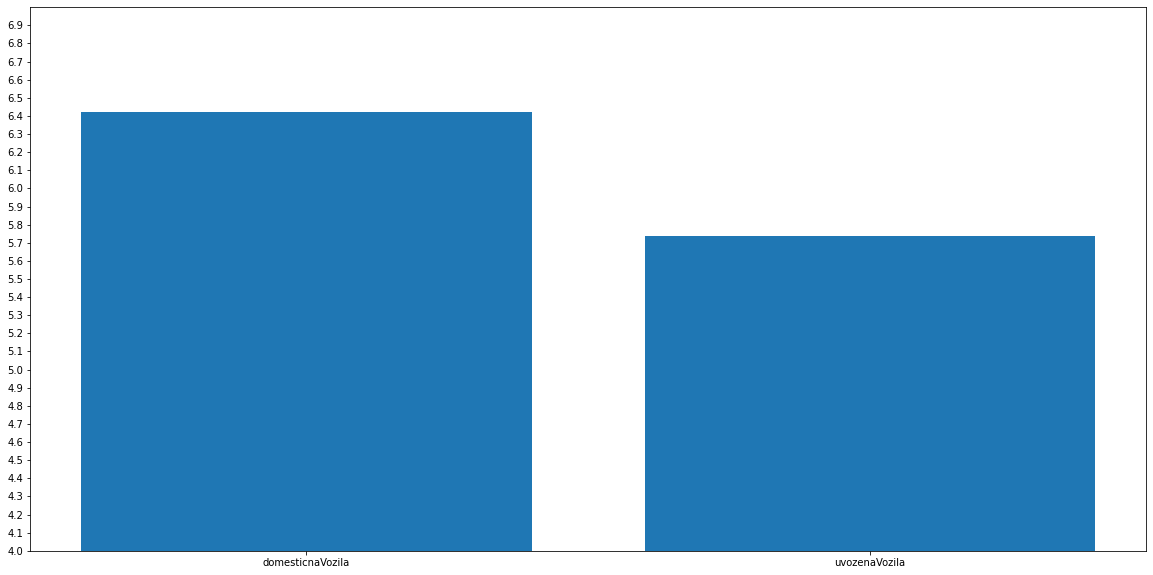

In [274]:
plt.bar(["domesticnaVozila", "uvozenaVozila"], [100*stevd/vsad, 100*stevu/vsau])
plt.yticks(np.arange(4, 7, 0.1))
plt.ylim(4,7)
plt.show()

## Prevrteni kilometri

In [17]:
# Prevrteni kilometri
#print(data["2017"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]])

dict1 = data["2017"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict2 = data["2018"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict3 = data["2019"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict4 = data["2020"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict5 = data["2021"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()

dd = defaultdict(list)

for d in (dict1, dict2, dict3, dict4, dict5):
    for key, value in d.items():
        if(not math.isnan(value) and value != 0):
            dd[key].append(value)


In [21]:
prevrteni = dict()

for x,v in dd.items():
    if(sorted(v) != v):
        prevrteni[x] = v

len(prevrteni)
prevrteni

{'WF0UXXGAJU7M88105': [137958.0, 152222.0, 143849.0, 170009.0, 180922.0],
 'ZCFD55C8005946674': [3112.0, 3402.0, 3024.0, 4150.0, 4378.0],
 'SJNEAAN16U0483101': [201900.0, 210590.0, 233046.0, 261880.0, 295.0],
 'WDB9036121R955838': [277687.0, 307760.0, 320461.0, 313285.0, 316322.0],
 'VNKKH98350A222863': [27309.0, 34329.0, 77132.0, 39037.0],
 'VF1KW41C153641973': [88393.0, 130608.0, 169650.0, 169110.0, 212400.0],
 'VF1JMRG0634757659': [169912.0, 96584.0, 202070.0, 214000.0, 222843.0],
 'VF3EBRHWB13240788': [256620.0, 245744.0, 286640.0, 298492.0, 311326.0],
 'WAUZZZ8E33A248885': [432460.0, 442810.0, 450012.0, 304211.0, 307326.0],
 'WVWZZZ5ZZ60020582': [42851.0, 45830.0, 48432.0, 506015.0, 52000.0],
 'VF7GJRHYK93030880': [287800.0, 185509.0, 199416.0],
 'WVGZZZ5NZ9W007207': [145810.0, 169300.0, 185228.0, 202246.0, 218.0],
 'VF1BB0S0F22831110': [75626.0, 68530.0, 102698.0, 113544.0, 125071.0],
 'SHHEP23904U205554': [260230.0, 236413.0, 258800.0, 277054.0, 298450.0],
 'RFBD1100061700122': 

## Izvozi vozil

In [35]:
izv1 = data["2017"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izv2 = data["2018"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izv3 = data["2019"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izv4 = data["2020"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izv5 = data["2021"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()

In [59]:
# Neki z izvozi

tmpd = defaultdict(list)


for d in (izv1, izv2, izv3, izv4, izv5):
    for key, value in d.items():
        tmpd[key].append(value)

#izvozi = {x:y for x,y in tmpd.items() if len(y) == 1}

izvozi = dict()

tmpd

for x, y in tmpd.items():
    #print(y[0].astype("string"))
    if (type(y[-1]) == str and int(y[-1].split(".")[2]) < 2022):
        #print(y[0], type(y[0]))
        izvozi[x] = y



izvozi

{'WAUZZZ4BZ1N098776': ['17.07.2018', '17.07.2019', '17.07.2020'],
 'ZFA18700000551936': ['13.10.2018', '13.10.2019', '13.10.2020', '24.11.2021'],
 'VF1JA050527494371': ['17.01.2018', '17.01.2019'],
 'SWNB35000D0003066': ['15.04.2021'],
 '153644': ['13.04.2018'],
 '001226717': ['08.04.2018', '08.04.2019', '08.04.2020', '08.04.2021'],
 '901045614': ['04.04.2018', '04.04.2019', '04.04.2020', '04.04.2021'],
 'ZFA24400007239710': ['28.10.2018'],
 '1008984': ['26.04.2018'],
 'WAUZZZ8DZYA148370': ['07.02.2018', '07.02.2019', '07.02.2020', '25.09.2021'],
 'XLRTEH4300G007511': ['19.10.2018', nan, '19.10.2020', '19.10.2021'],
 'WVWZZZ6NZVW076440': ['20.04.2018'],
 'VF1BG4TB635115787': ['28.03.2018', '28.03.2019', '19.07.2020', '19.07.2021'],
 'WDF63960113022647': ['25.01.2018', '03.09.2019'],
 'XLRTE47XS0E711153': ['04.05.2018'],
 'KNEBA24426T270123': ['13.06.2018', '13.06.2019'],
 'CF7MCWJZF65544433': ['24.01.2018', nan, '24.01.2020', '24.01.2021'],
 'WF0BXXGAJBXE34976': ['04.06.2018', '04.06.2

In [26]:
data["2017"][1].columns.values.tolist()

['ZNAMKA',
 'TOVARNISKA_OZNAKA',
 'KOMERCIALNA_OZNAKA',
 'KOMERCIALNI_TIP',
 'VIN',
 'VIN_TRAKTORJA',
 'KATEGORIJA_OZNAKA',
 'KATEGORIJA_OPIS',
 'NADGRADNJA_OZNAKA',
 'NADGRADNJA_OPIS',
 'DODATNA_NADGRADNJA_OPIS',
 'VRSTA_GORIVA_OZNAKA',
 'VRSTA_GORIVA_OPIS',
 'NAMEN_VOZILA',
 'DATUM_PRVE_REGISTRACIJE',
 'DATUM_PRVE_REGISTRACIJE_SLO',
 'PREVOZENI_KILOMETRI',
 'LASTNIK_VOZILA',
 'UPORABNIK_VOZILA',
 'DATUM_PREGLEDA',
 'TEHNICNI_ZAPISNIK_RAZLOG',
 'TEHNICNI_PREGLED_STATUS',
 'VELJA_OD',
 'VELJA_DO',
 'IZVAJALNA_ENOTA_OPIS']